# Workshop 2: Clinical Variables Selection & Feature Engineering / 臨床変数の選択と特徴量エンジニアリング

# 🎯 Workshop Goals
The goal of this workshop is to provide participants with a deep understanding of data preprocessing in the data science workflow. Specifically, by the end of this workshop, participants should be able to:

1. **Understand the importance of Data Preprocessing Techniques**: Understanding thes significance of data preprocessing in the data science workflow. This includes to be able to apply common techniques such as cleaning, normalization, transformation, and reduction of data. This also includes handling missing data, outliers, skewed data, and data with different scales.

3. **Familiarize with Data Pre-processing Techniques**: such as feature scaling, dimensionality reduction, and feature engineering.

4. **Apply data pre-processing techniques**: This involved the practical application of data preprocessing techniques to real-world datasets and to be able to evaluate the impact of different preprocessing techniques on machine learning model performance.

Be aware of the potential biases that can be introduced in data preprocessing, and how to identify and mitigate them.
Throughout the workshop, participants will engage in hands-on activities, case studies, and real-world examples. They will work in groups to apply the concepts learned to real datasets, and engage in discussions to share their experiences and insights. By the end of the workshop, participants should have gained a solid understanding of data preprocessing techniques and their importance in the data science workflow, and be able to apply these techniques to improve the performance of machine learning models.

# 🎯このWorkshopの目標
本ワークショップは、データの前処理についての理解を深めてもらうことを目的としています。
本ワークショップを通じて学ぶこと：

1. **データ前処理技術の重要性の理解**: データの前処理についての知識を会得します。一般的な技法であるデータ整理、正規化、変換、削減などができるようになることに加え、欠損データや外れ値、歪んだデータ、異なるスケールを持つデータへの対処も含みます。

3. **データの前処理技術の習得**: 特徴量スケーリング、次元削減、特徴量エンジニアリングなど

4. **データ前処理技術の適用**: 実際のデータにデータの前処理を施し、それぞれの処理が機械学習モデルの挙動に与える影響を評価します。

データの前処理によって導入されうる潜在的なバイアスとそれを特定して軽減する方法を認識します。
ワークショップを通じて、参加者の皆様には実戦的な活動やケーススタディ、実際の事例に取り組んでいただきます。グループに分かれて学んだ概要を実際のデータセットに適用し、ディスカッションを行って経験と洞察を共有します。ワークショップ終了時にはデータの前処理技術とその重要性についてしっかりと理解し、機械学習モデルの性能向上に活用できるようになります。

# ✏️ Expected Deliverables

1. A report or dashboard summarizing the results of EDA, including visualizations and statistical summaries of the data distribution and correlations.

2. A set of code scripts or pipelines that automate the data preprocessing process, making it easier and more efficient to apply these techniques to future datasets.

3. A cleaned dataset that has undergone preprocessing techniques such as removal of duplicates, handling missing data, and dealing with outliers. The cleaned dataset should be ready to be fed into machine learning models.

# ✏️ 最終目標

1. EDA* の結果をデータの分布と相関について統計的にまとめたレポートやダッシュボードを作成し、データを可視化する

2. データの前処理を自動化するためのコードかパイプラインのセットを作成し、将来的に使うデータセットに簡単かつ効率的に適用できるようにする

3. 重複の除去、欠損データの処理、外れ値処理などを施してデータセットを整備し、機械学習モデルに入れる準備を整える

\* Exploratory Data Analysis: 探索的データ分析

# ❗ Highlighted Pitfall(s)
1. Make sure to apply preprocessing steps only to the training data and avoid using information from the validation set to prevent data leakage.

2. Check for potential biases that could be introduced or amplified by preprocessing techniques, and evaluate the impact of these techniques on different subgroups of the data.

3. Carefully evaluate the appropriateness of different preprocessing techniques for a given dataset and ensure that the techniques are applied correctly to avoid incorrect preprocessing that could lead to poor model performance or incorrect conclusions about the data.

# ❗ 注意事項
1. データの漏洩を防ぐため、前処理に利用するデータは学習データのみで、検証データの情報を用いないようにすること。

2. 前処理によって導入・強調されうる潜在的なバイアスを確認し、データの異なるサブグループにおけるこれらの処理技術の影響を評価する。

3. 与えられたデータセットに対する様々な前処理技術の適切性を慎重に評価する。モデルの性能低下やデータに関する誤った結論につながる誤った前処理を避けるために、前処理が正しく適用されるようにする。

Add visual aid here (figures without preprocessing)
前処理なしの図の追加

## **1.  Setup environment / 環境構築**
---

In [ ]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For missing values
import missingno as msno

# Linear algebra operations
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, mutual_info_regression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Google Drive の中身が全部見られたくない人のためのアンマウント用
# この場合データセットはランタイムにアップロードされるが、時間制限によって削除されるため注意すること

# drive.flush_and_unmount('/content/drive')

 ## **2. Data Analysis / データ分析**
---

Once we understand the problem, we have formed a multidisciplinary team, formulated the research question,  hypothesis, we have to start working with the data. What data do we have? How do they look? What distributions do they have?

Let's remember that in data science, data is the most important thing, and whether or not we can solve a problem depends on the data quality. At the same time, understanding the data also helps us to have a clearer vision of what we are facing and in case the data is not very good, we can at least fix it.

Specifically, understanding the problem and the data are the essential phases in a data science project. An error in this phase is much more critical than an error in the modeling and evaluation phases. We must bear in mind that machine learning is not a magical tool that solves any type of problem, but rather a mathematical/statistical tool that learns from what we teach it, therefore if the data has biases, the model will also have them.

問題を理解したら、チームで研究課題を決めて仮説を立ててデータ処理に取り組みましょう。どんなデータがありますか？どのように見えますか？どんな分布を持っていますか？

データサイエンスにおいてはデータが最も重要であり、課題解決はデータの質の良し悪しにかかっています。
また、データを理解することは直面している問題を明確に捉えることに繋がります。さらに、データを理解することでデータの良くない部分を見つけ、対処をすることができます。

問題とデータを理解することはデータサイエンスにおいては不可欠な要素です。
この過程での失敗は後に出てくるモデリングや評価といった過程での失敗よりも重大なものとなります。
機械学習とは我々が教えたことを学習する数学的/統計的な道具です。
したがって、データにバイアスがあればモデルにもバイアスが生じます。
**機械学習はどんな問題でも解決してくれる魔法の道具ではない**ということを頭に置いておきましょう。


#### Read the dataset

Let's asume that you already have the dataset of workshop 1:

#### データセットの読み込み

workshop 1のデータセットを既に持っているものとします。

###### ✏️ Read the dataset and use the function null_values to see which columns has missing data.

###### ✏️ データセットを読み込み、`null_values`関数を用いて欠損値のある列を探します。

In [ ]:
PATH = "/content/drive/MyDrive/workshops_preparation/for_japan/solutions/output/workshop_1_data_final.csv"

# Read file here:
df = pd.read_csv(PATH)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 17169 rows and 138 columns


In [ ]:
# Print first 5 rows
df.head()

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4.0,89.0,0,26184834,F,1,...,-3.0,96.0,-4.0,19.5,-64.0,36.72,NaN,NaN,-4.0,SR (Sinus Rhythm)
1,10002428,38875437,2156-04-21 02:20:00,98.0,-3.0,100.0,0,28662225,F,1,...,-5.0,70.0,-5.0,23.0,NaN,NaN,-10.0,135.0,-20.0,ST (Sinus Tachycardia)
2,10002760,31831386,2141-04-20 16:10:00,97.0,-10.0,99.0,0,28094813,M,0,...,-10.0,70.0,-10.0,16.0,NaN,NaN,NaN,NaN,-10.0,SR (Sinus Rhythm)
3,10002760,31831386,2141-04-21 02:04:00,99.0,-4.0,100.0,0,28094813,M,0,...,-4.0,81.0,-4.0,17.0,NaN,NaN,NaN,NaN,-4.0,SR (Sinus Rhythm)
4,10002760,31831386,2141-04-21 04:03:00,99.0,-3.0,99.0,0,28094813,M,0,...,-3.0,69.0,-3.0,8.5,NaN,NaN,NaN,NaN,-3.0,SR (Sinus Rhythm)


In [ ]:
def null_values(df: pd.DataFrame) -> None:
  """
  データ内に欠損値があるかどうかをチェックする関数。
  欠損値がない場合: There aren't null values in the dataframe
  欠損値がある場合: 該当箇所の列名と欠損値の数を出力する
  """
  nulls = df.isnull().sum()
  if nulls.sum() == 0:
      print("There aren't null values in the dataframe")
  else:
      print('Null values:')
      print(nulls[nulls > 0])

In [ ]:
# Check if there are null values here:
null_values(df)

Null values:
weight                 1320
height                 3183
BMI                    3243
delta_vent_start       2015
ventilation_status     2015
                      ...  
temperature            7442
delta_glucose         11425
glucose               11425
delta_heart_rhythm     1834
heart_rhythm           1834
Length: 109, dtype: int64


 ## **3. Understand Your Data / データを理解する**
---


### Understand the variables:

The first step is to understand what variables your dataset has and how these variables are distributed. The columns and data types are described in [Variable Dictionary (GitHub Link)](https://github.com/TokyoDatathon2023/notebooks/blob/main/variable_dictionary.md).

Discuss with your team about the problem and what variables are needed.

### 変数を理解する:

まずは、データセットがどのような変数を持ち、それらの変数がどのように分布しているのかを理解しましょう。

データの変数一覧：[Variable Dictionary (GitHub Link)](https://github.com/TokyoDatathon2023/notebooks/blob/main/variable_dictionary.md).

どの変数が必要かをチームで話し合いましょう。


### Select your variables
**Task:** To simplify the task we will use a reduced group of variables for the following analysis. Ideally you should decide with your groups which variables you consider to be really important.

The variables should be selected:
1. Always thinking about the question to solve and the hypothesis.
2. Using the clinical experience of the members of the group and if possible supported by literature.
3. Using mathematical and statistical methods.

### 変数の選択
**タスク：**
作業を単純化するために、これ以降の分析で使用する変数を減らして作業を進めます。
重要な変数が何か、分析に必要な変数は何か、をグループで話し合いましょう。

気を付けること
1. 解決すべき課題と仮説を常に意識すること。
2. グループのメンバーの臨床経験を基にすること。可能であれば文献による裏付けもとること。
3. 数学的・統計的な手法を用いること。


###### ✏️ Select demographic variables:
Due to the challenge we need some demographic information select the relevant columns:

###### ✏️ 患者背景に関する人口統計変数の選択:
課題解決のためにはいくつかの患者背景に関する人口統計学的情報が必要です。

In [ ]:
# Patient main information
patient_info = ['subject_id', 'stay_id', 'SaO2', 'delta_SpO2', 'SpO2', 'hidden_hypoxemia', 'ventilation_status']

# Demographic variables
demographic_variables = ['gender', 'anchor_age', 'race_group', 'language', 'insurance']

The clinical variables selected were selected based on the variables that are most related with SaO2 and Spo2 and a correlation method was used to filter those variables.
You can use other methods and criteria!

SaO2とSpO2と関連性の高い変数を選択し、それらの変数をフィルタリングするために相関法を用います。もちろん、他の方法を採用することも可能です！

###### ✏️ Select clinical variables
1. Manual variable selection: Manually select with you team the variables that are clinically important. Don't worry if there are many, later we will use other methods to filter the variables

###### 臨床変数の選択
1. 手動での変数選択: チームで話し合って、臨床的に重要な変数を手動で選択します。
後で他の方法でフィルタリングを行うので、数が多くなっても気にせず選択してください。

In [ ]:
# Static clinical variables
static_clinical_variables = ['CCI', 'BMI', 'SOFA_admission']

# Temporal clinical variables
sofa_variables = [column for column in df.columns if 'sofa' in column]
temporal_clinical_variables = ['SpO2', 'SaO2', 'FiO2', 'delta_vent_start', 'delta_rrt', 'delta_vp_start',
                               'mch', 'mchc', 'mcv', 'platelet', 'rbc', 'rdw', 'wbc', 'inr', 'pt', 'ptt', 'alt', 'alp', 'ast',
                               'bilirubin_total', 'delta_albumin', 'albumin', 'aniongap', 'bicarbonate', 'bun', 'calcium', 'chloride',
                               'creatinine', 'glucose_lab', 'sodium', 'potassium', 'ph', 'lactate', 'norepinephrine_equivalent_dose',
                               'hemoglobin', 'hematocrit', 'delta_ld_ldh', 'ld_ldh'] + sofa_variables

outcomes = ['los_hospital', 'los_icu', 'mortality_in']

treatment = ['invasive_vent', 'rrt']

###### ✏️ Variable filtering
Let's now employ a few techniques to filter the variables. You should choose a technique to do it.

Hint: To choose the variables most connected with the columns SpO2 and SaO2, we utilised the correlation as an example. You are not required to employ the identical column(s). Select the columns in accordance with your hypothesis.

###### ✏️ 変数のフィルタリング
変数をフィルタリングする手法をいくつか使ってみましょう。
どのフィルタリング手法を使うのかはチームで決定してください。

ヒント: 先ほどは例として、SpO2列とSaO2列と最も関係のある変数を選択するために、相関を用いていましたが、チームで立てた仮説に基づいて適宜必要な列を選択して下さい。

In [ ]:
from typing import Any, List, Union

def get_most_correlated(df: pd.DataFrame, variable: str, n: int) -> List[str]:
  """
  特定の変数に最も相関(正・負ともに)のある変数を出力する関数
  引数(型名):
    df(pandas dataframe): 計算対象の変数を含むデータ
    variable(string): 相関を計算したい変数名(Eg. 'SaO2')
    n(integer): 最も相関のある変数として取得したい変数の数を表す整数
  戻り値:
    最も相関(正・負ともに)の強い上位n個の変数名のリスト
  """

  # Calculate the correlation matrix
  corr_matrix = df.corr()

  # Print the correlation matrix
  correlation = corr_matrix[variable].sort_values(ascending=False)
  positive_correlated = correlation[:n]
  inversely_correlated = correlation[-n:]
  print('#'*40, f' {variable} ' , '#'*40)
  print(f'The {n} most correlated variables to variable {variable} are: ')
  print(positive_correlated)
  print(f'The {n} most inversely correlated variables to variable {variable} are: ')
  print(inversely_correlated)

  return list(positive_correlated.index) + list(inversely_correlated.index)

In [ ]:
# Optional: add another feature selection process to improve the model at a later stage
array_like = Union[pd.DataFrame, np.ndarray, List, Any]

outcome_var = "mortality_in"
K = 7
method = f_classif  # f_classif, chi2, mutual_info_classif, mutual_info_regression, etc

def feat_select(features: List[str], df: pd.DataFrame, outcome_var: str, K: int, method: Any) -> array_like:
  X = df[features]
  y = df[outcome_var]
  return SelectKBest(method, k=K).fit(X, y).get_feature_names_out()

# resulting_temporal_clinical_variables = feat_select(resulting_temporal_clinical_variables, df, outcome_var, K, method)

In [ ]:
print(f'The number of initial temporal clinical variables is {len(temporal_clinical_variables)}')

# Select the number of related columns:
#n1 =  # Eg. 8
#n2 =  # Eg. 10
#ref_col1 = # Eg. 'SaO2'
#ref_col2 = # Eg. 'SpO2'

n1 = 8
n2 = 10
ref_col1 = 'SpO2'
ref_col2 = 'SaO2'

# Get variables correlated to 'ref_col'
columns_1 = get_most_correlated(df[temporal_clinical_variables], variable=ref_col1, n=n1)

# Get variables correlated to 'ref_col_2'
columns_2 = get_most_correlated(df[temporal_clinical_variables], variable=ref_col2, n=n2)

# Merge the resulting columns in a single list:
resulting_temporal_clinical_variables = list(set(columns_1+columns_2))

print(f'The number of resulting variables is {len(resulting_temporal_clinical_variables)}')

The number of initial temporal clinical variables is 50
########################################  SpO2  ########################################
The 8 most correlated variables to variable SpO2 are: 
SpO2               1.000000
SaO2               0.581258
chloride           0.133378
albumin            0.133272
ph                 0.095493
mchc               0.075068
delta_sofa_cns     0.060068
delta_sofa_coag    0.050834
Name: SpO2, dtype: float64
The 8 most inversely correlated variables to variable SpO2 are: 
creatinine                       -0.088402
inr                              -0.092777
pt                               -0.097365
FiO2                             -0.112776
bun                              -0.113027
aniongap                         -0.145249
norepinephrine_equivalent_dose   -0.191103
sofa_resp                        -0.293453
Name: SpO2, dtype: float64
########################################  SaO2  ########################################
The 10 most correlated v

In [ ]:
# Get the resulting dataframe
variables = list(set(patient_info + demographic_variables + static_clinical_variables + resulting_temporal_clinical_variables + outcomes + treatment))

df = df [variables]
df.head()

,language,inr,ventilation_status,FiO2,creatinine,albumin,aniongap,anchor_age,bun,rrt,...,mcv,BMI,SOFA_admission,los_icu,norepinephrine_equivalent_dose,SaO2,stay_id,sofa_coag,mortality_in,mchc
0,ENGLISH,1.1,NonInvasiveVent,NaN,NaN,3.5,NaN,68,NaN,0.0,...,NaN,26.370238,8,9.17,NaN,90.0,37510196,NaN,1,NaN
1,ENGLISH,1.1,InvasiveVent,NaN,0.5,NaN,11.0,80,25.0,0.0,...,98.0,NaN,10,7.00,NaN,98.0,38875437,NaN,0,31.5
2,ENGLISH,1.2,InvasiveVent,NaN,0.9,4.2,NaN,56,18.0,0.0,...,94.0,26.588751,7,1.04,0.0952,97.0,31831386,0.0,0,34.4
3,ENGLISH,1.2,InvasiveVent,NaN,NaN,4.2,NaN,56,NaN,0.0,...,NaN,26.588751,7,1.04,0.1104,99.0,31831386,NaN,0,NaN
4,ENGLISH,1.2,InvasiveVent,NaN,0.9,4.2,8.0,56,18.0,0.0,...,94.0,26.588751,7,1.04,0.1104,99.0,31831386,0.0,0,33.7


###### ✏️ Outcome Leakage
Outcome leakage occurs when the model is inadvertently given access to data it shouldn't have until the time of prediction. For instance, when predicting hidden hypoxemia, including the SOFA respiratory score (sofa_resp), which includes PaO2 in its definition, in our model could lead to leakage. This is because PaO2 is directly related to the outcome we're trying to predict. It's important to be mindful of potential outcome leakages like this when selecting variables for model training.

###### ✏️ Outcome Leakage（結果の漏洩）
Outcome leakage とは、予測時までにモデルがアクセスすべきでないデータに誤ってアクセスする場合を指します。例えば、潜在性低酸素血症を予測する際に、それ自身の定義に PaO2 を含む SOFA 呼吸器スコア（sofa_resp）をモデルに含めてしまうと、漏洩が生じる可能性があります。これは、 PaO2 が我々が予測しようとしている結果と直接関連しているからです。モデルの訓練のために変数を選択する際には、このような潜在的な outcome leakage に注意することが重要です。

In [ ]:
# Let's discuss in the team and eliminate features that could potentially cause outcome leakage!

df = df.drop(columns=outcomes+['sofa_resp']) # 'delta_sofa_resp' should also be dropped if included.

### Understand how variables are distributed:

### データの分布を理解する:

To see a description of some statistics of each numeric variable, you can use `df.describe()`:


各数値変数の統計情報を見るには`describe()`関数を用います。

In [ ]:
df.describe()

,inr,FiO2,creatinine,albumin,aniongap,anchor_age,bun,rrt,invasive_vent,pt,...,subject_id,delta_sofa_cv,mcv,BMI,SOFA_admission,norepinephrine_equivalent_dose,SaO2,stay_id,sofa_coag,mchc
count,12162.000000,1275.000000,12094.000000,11207.000000,11704.000000,17169.000000,12086.000000,17069.000000,17169.000000,12160.000000,...,1.716900e+04,14227.000000,11989.000000,13926.000000,17169.000000,8683.000000,17169.000000,1.716900e+04,11235.000000,11987.000000
mean,1.464134,50.876078,1.582090,3.352262,14.413876,64.986371,30.074053,0.212725,0.764809,16.003561,...,1.501337e+07,-7.100302,90.732455,29.673232,7.775526,2.235859,95.797758,3.494848e+07,0.790209,33.257345
std,0.735418,17.291490,1.273451,0.803015,4.713470,14.310498,22.528957,0.409247,0.424131,7.090763,...,2.881796e+06,6.425042,5.972876,7.398039,3.816007,3.317068,3.374777,2.882251e+06,0.901432,1.677013
min,0.700000,21.000000,0.100000,1.100000,3.000000,18.000000,2.000000,0.000000,0.000000,8.100000,...,1.000188e+07,-380.000000,58.000000,7.431629,0.000000,0.004000,65.000000,3.000065e+07,0.000000,25.300000
25%,1.200000,40.000000,0.800000,2.700000,11.000000,57.000000,15.000000,0.000000,1.000000,13.000000,...,1.249128e+07,-9.000000,87.000000,24.734132,5.000000,0.050000,95.000000,3.247045e+07,0.000000,32.200000
50%,1.300000,50.000000,1.200000,3.400000,14.000000,67.000000,22.000000,0.000000,1.000000,14.200000,...,1.495339e+07,-6.000000,90.000000,28.405504,7.000000,0.140100,97.000000,3.481731e+07,1.000000,33.300000
75%,1.500000,50.000000,1.900000,4.000000,17.000000,75.000000,37.000000,0.000000,1.000000,16.300000,...,1.752511e+07,-3.000000,94.000000,33.019217,10.000000,6.018100,98.000000,3.745870e+07,1.000000,34.400000
max,22.600000,100.000000,21.200000,5.400000,50.000000,91.000000,231.000000,1.000000,1.000000,150.000000,...,1.999775e+07,-1.000000,130.000000,100.897959,21.000000,33.310900,100.000000,3.999923e+07,4.000000,40.100000


The problem with `data.describe()` is that it groups using all the data of each variable, this means that if in our group there are populations that are underestimated or overestimated, the description will not take that into account. An alternative to solve that problem is using the function `groupby()`. With group by we can generate groups of populations using variables. An exmple is:

`data.describe()`関数の問題は、各変数の全データをまとめ評価してしまうことです。そのため過小評価もしくは過大評価されているサブグループがいたとしても、考慮されません。この問題に対処するために、`groupby()`関数を使うことで、サブグループ毎に評価ができます。

In [ ]:
# Group the mean of oxygen saturation of arterial blood (SaO2) by gender
avg_sao2_by_gender = df.groupby('gender')['SaO2'].mean()
avg_sao2_by_gender

gender
F    95.822899
M    95.784625
Name: SaO2, dtype: float64

You can also generate groups using more than one variable and more than one grouping methods

複数の変数と複数のグループ化メソッドを用いてグループを作成することもできます。

In [ ]:
# Obtain count, mean, standard deviation, min value and max value for (SaO2) and (SpO2) grouping by gender and race group:
avg_sao2_by_ethnicity = df.groupby(['gender', 'race_group']).agg({
    'SaO2': ['count', 'mean', 'std', 'min', 'max'],
    'SpO2': ['count', 'mean', 'std', 'min', 'max']
})
avg_sao2_by_ethnicity

SaO2                                    SpO2             \
                  count       mean       std   min    max count       mean   
gender race_group                                                            
F      Asian         99  95.818182  2.532900  88.0   99.0    99  97.353535   
       Black        501  95.506986  3.638468  77.0  100.0   501  97.267465   
       Hispanic     219  95.789954  3.688774  67.0  100.0   219  97.091324   
       Other       1156  95.820675  3.429931  66.0  100.0  1156  96.802768   
       White       3916  95.865935  3.417977  66.0  100.0  3916  96.911389   
M      Asian        352  95.647727  3.150688  78.0  100.0   352  97.176136   
       Black        686  95.422741  3.505867  69.0   99.0   686  97.255102   
       Hispanic     327  96.211009  2.961118  77.0   99.0   327  97.449541   
       Other       2154  95.447539  3.710530  65.0  100.0  2154  96.574745   
       White       7759  95.898441  3.231626  65.0  100.0  7759  96.946514   

                                          
                        std   min    max  
gender race_group                         
F      Asian       4.601049  65.0  100.0  
       Black       3.729922  71.0  100.0  
       Hispanic    4.699294  67.0  100.0  
       Other       4.125208  68.0  100.0  
       White       3.769890  65.0  100.0  
M      Asian       3.457137  76.0  100.0  
       Black       3.674008  67.0  100.0  
       Hispanic    3.260150  79.0  100.0  
       Other       4.214547  68.0  100.0  
       White       3.654709  68.0  100.0

Alternatively, there are also libraries that allow us to do this process automatically. Below is an example using tableone library.

Install using the command `!pip install tableone`

他にも、同様の処理を自動で行ってくれるライブラリもあります。
以下に`tableone`ライブラリを使用した例を示します。

インストール方法：`!pip install tableone`

In [ ]:
# As a first step let's do a preprocessing to some variables like:
df['language'] = df['language'].replace({'ENGLISH': 'Proficient', '?': 'Limited Proficiency'})

In [ ]:
!pip install tableone
from tableone import TableOne

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
groupby = ['race_group']

categorical_variables = ['gender', 'language', 'invasive_vent']
numerical_variables = ['anchor_age', 'CCI', 'SOFA_admission']
columns = categorical_variables + numerical_variables

labels ={'anchor_age': 'age',
         'SOFA_admission': 'SOFA'}


mytable = TableOne(df, columns=columns, categorical=categorical_variables, groupby=groupby, nonnormal=numerical_variables, rename=labels, pval=False)
mytable

Grouped by race_group                                                                                                            
                                                       Missing           Overall             Asian             Black          Hispanic             Other             White
n                                                                          17169               451              1187               546              3310             11675
gender, n (%)        F                                       0       5891 (34.3)         99 (22.0)        501 (42.2)        219 (40.1)       1156 (34.9)       3916 (33.5)
                     M                                              11278 (65.7)        352 (78.0)        686 (57.8)        327 (59.9)       2154 (65.1)       7759 (66.5)
language, n (%)      Limited Proficiency                     0       1905 (11.1)        276 (61.2)        171 (14.4)        403 (73.8)        516 (15.6)         539 (4.6)
                     Proficient                                     15264 (88.9)        175 (38.8)       1016 (85.6)        143 (26.2)       2794 (84.4)      11136 (95.4)
invasive_vent, n (%) 0                                       0       4038 (23.5)         76 (16.9)        300 (25.3)        156 (28.6)        702 (21.2)       2804 (24.0)
                     1                                              13131 (76.5)        375 (83.1)        887 (74.7)        390 (71.4)       2608 (78.8)       8871 (76.0)
age, median [Q1,Q3]                                          0  67.0 [57.0,75.0]  67.0 [54.0,73.0]  61.0 [52.0,71.0]  60.5 [47.2,71.0]  66.0 [52.0,75.0]  68.0 [59.0,76.0]
CCI, median [Q1,Q3]                                          0     5.0 [3.0,7.0]     5.0 [3.0,7.0]     5.0 [3.0,7.0]     5.0 [3.0,7.0]     5.0 [3.0,7.0]     5.0 [3.0,7.0]
SOFA, median [Q1,Q3]                                         0    7.0 [5.0,10.0]    9.0 [5.0,10.0]    8.0 [5.0,11.0]    8.0 [5.0,12.0]    8.0 [5.0,12.0]    7.0 [5.0,10.0]

###### ✏️ Use tableone

Now let's create a new tableone using all the variables to to measure differences between ethnic groups!

Hint: Use the function `get_categorical_numerical_variables` to get all the numeric and categorical variables. Then use those variables to generate a tableone of the whole dataset


###### ✏️ tableone を使う

では、人種間の差を測定するために、全ての変数を用いて新しいtableoneを作成しましょう。

ヒント:
最初に、`get_categorical_numerical_variables` 関数を使ってすべての数値変数とカテゴリー変数を取得します。次に、それらの変数を用いてデータセット全体のtableoneを作成します。


In [ ]:
from typing import Tuple

def get_categorical_numerical_variables(df: pd.DataFrame, limit: int, ignore: List[str], verbose: bool = True) -> Tuple[List[str], List[str]]:
  """
  数値変数とカテゴリー変数を取得するための関数
  引数:
    df: 全ての変数を含む pandas のデータフレーム
    limit: 変数がカテゴリカルであると判定するための最大の要素数を表す整数
    ignore: 無視する列名のリスト

  戻り値:
    categorical_columns, numerical_columns: カテゴリー変数と数値変数の名前を含むリスト
  """

  categorical_columns = []
  numerical_columns = []

  for column in df.columns:
    if ignore:
      if column in ignore:
        continue
    unique_values = len(pd.unique(df[column]))
    if unique_values <= limit:
      if verbose:
        print(f'The column {column} has {unique_values}, so is categorical')
      categorical_columns.append(column)
    else:
      if verbose:
        print(f'The column {column} has {unique_values}, so is numerical')
      numerical_columns.append(column)

  return categorical_columns, numerical_columns

In [ ]:
# Select the columns for the tableone
#groupby = #
#ignore = ['column1', 'column2', ...] + groupby
#limit = # Max. Number of unique values to be categorical (E.g. 15)

groupby = ['race_group']
ignore = ['SaO2_timestamp', 'stay_id', 'subject_id'] + groupby
limit = 10
categorical_columns, numerical_columns = get_categorical_numerical_variables(df, limit=limit, ignore=ignore)

The column language has 2, so is categorical
The column inr has 81, so is numerical
The column ventilation_status has 7, so is categorical
The column FiO2 has 23, so is numerical
The column creatinine has 110, so is numerical
The column albumin has 45, so is numerical
The column aniongap has 46, so is numerical
The column anchor_age has 73, so is numerical
The column bun has 163, so is numerical
The column rrt has 3, so is categorical
The column gender has 2, so is categorical
The column invasive_vent has 2, so is categorical
The column pt has 410, so is numerical
The column CCI has 18, so is numerical
The column delta_vent_start has 5273, so is numerical
The column ph has 31, so is numerical
The column chloride has 57, so is numerical
The column SpO2 has 36, so is numerical
The column insurance has 3, so is categorical
The column hidden_hypoxemia has 2, so is categorical
The column bilirubin_total has 311, so is numerical
The column delta_SpO2 has 10, so is categorical
The column delt

In [ ]:
#Total_columns =
Total_columns = categorical_columns + numerical_columns

TableOne(df, columns=Total_columns, categorical=categorical_columns, nonnormal=numerical_columns, groupby=groupby)

Grouped by race_group                                                                                                                                                         
                                                                                 Missing                  Overall                     Asian                     Black                 Hispanic                     Other                    White
n                                                                                                           17169                       451                      1187                      546                      3310                    11675
language, n (%)                                Limited Proficiency                     0              1905 (11.1)                276 (61.2)                171 (14.4)               403 (73.8)                516 (15.6)                539 (4.6)
                                               Proficient                                            15264 (88.9)                175 (38.8)               1016 (85.6)               143 (26.2)               2794 (84.4)             11136 (95.4)
ventilation_status, n (%)                      HFNC                                 2015                144 (1.0)                   2 (0.5)                  16 (1.5)                 12 (2.6)                  37 (1.3)                 77 (0.7)
                                               InvasiveVent                                          13102 (86.5)                375 (91.7)                884 (85.5)               387 (83.0)               2604 (90.2)              8852 (85.5)
                                               NonInvasiveVent                                          101 (0.7)                   1 (0.2)                   8 (0.8)                  4 (0.9)                  18 (0.6)                 70 (0.7)
                                               SupplementalOxygen                                     1775 (11.7)                  31 (7.6)                123 (11.9)                60 (12.9)                 225 (7.8)              1336 (12.9)
                                               Tracheostomy                                              27 (0.2)                                             3 (0.3)                  3 (0.6)                   4 (0.1)                 17 (0.2)
                                               None                                                       5 (0.0)                                                                                                                         5 (0.0)
rrt, n (%)                                     0.0                                   100             13438 (78.7)                304 (67.9)                889 (75.2)               417 (76.7)               2381 (72.5)              9447 (81.4)
                                               1.0                                                    3631 (21.3)                144 (32.1)                293 (24.8)               127 (23.3)                903 (27.5)              2164 (18.6)
gender, n (%)                                  F                                       0              5891 (34.3)                 99 (22.0)                501 (42.2)               219 (40.1)               1156 (34.9)              3916 (33.5)
                                               M                                                     11278 (65.7)                352 (78.0)                686 (57.8)               327 (59.9)               2154 (65.1)              7759 (66.5)
invasive_vent, n (%)                           0                                       0              4038 (23.5)                 76 (16.9)                300 (25.3)               156 (28.6)                702 (21.2)              2804 (24.0)
                                               1                                                     13131 (76.5)                375 (83.1)                887 (74.7)               390 (71.4)     

### visualize your data

While statistics are important, it is also very important and key to visualize the data. This will help to share the information and results in a visual and intuitive way, and identify anomalous and data patterns that could be useful when choosing the model.

### データを可視化する

統計情報が大切であると同時にデータの可視化も大切な鍵となってきます。
データの可視化は視覚的・直感的に情報と結果を共有するので、モデルを選ぶときに有用な、異常やデータパターンを特定することに役立ちます。

#### Bar charts and histograms
Bar charts and histograms can be used to see how our data is distributed and how many instances there are of each class, this way we can identify imbalances in the classes and avoid overfitting in the models

To create a histogram with seaborn, you can use the code:


```
sns.histplot(data=df, x="column_name", kde=False) #optional kwarg: hue="column_2"
plt.title('Title')
plt.show()
```




#### 棒グラフとヒストグラム

棒グラフやヒストグラムを使うことでデータの分布や各クラスの件数を見ることができます。
このようにしてクラスの不均衡を見つけ、過学習を防ぐことができます。

seabornでヒストグラムを作成するには以下のコードを使用します。
```
sns.histplot(data=df, x="column_name", kde=False) #optional kwarg: hue="column_2"
plt.title('Title')
plt.show()
```




###### ✏️ Plot the distribution by race group

###### ✏️ 人種分布のプロット

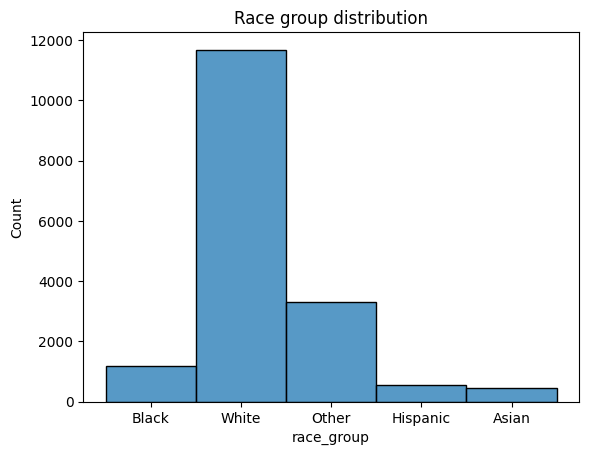

In [ ]:
# Code here
sns.histplot(data=df, x="race_group", kde=False)
plt.title('Race group distribution')
plt.show()

###### ✏️ Plot the distribution by gender

###### ✏️ 性別分布のプロット

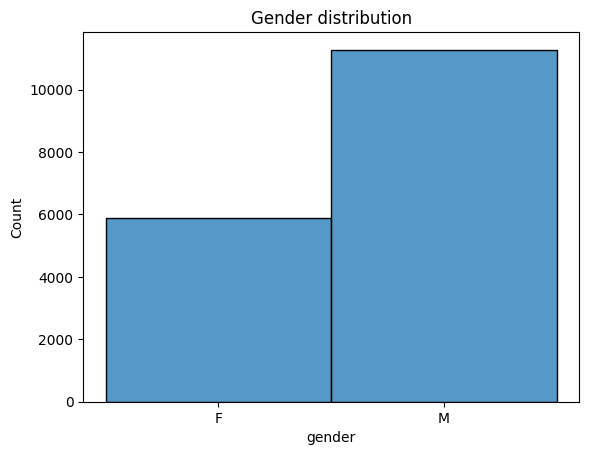

In [ ]:
# Code here
sns.histplot(data=df, x="gender", kde=False)
plt.title('Gender distribution')
plt.show()

###### ✏️ Plot the distribution by age and race group

###### ✏️ 年齢と人種の分布のプロット

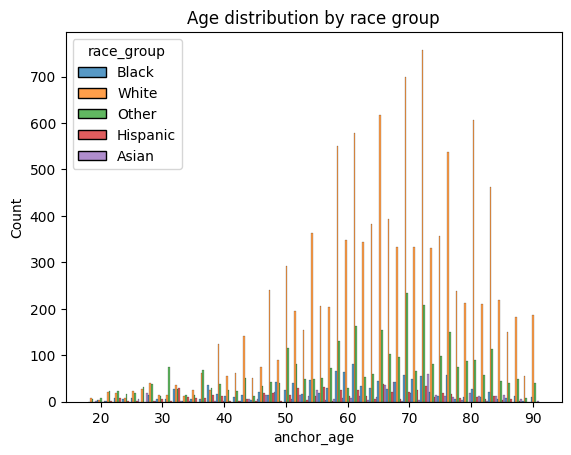

In [ ]:
# Code here
sns.histplot(data=df, x="anchor_age", hue="race_group", multiple="dodge")
plt.title('Age distribution by race group')
plt.show()

#### Box plots and violin plots
**Outilers ❗❗❗**: While in some cases there are no null values, could be outliers values. These outliers are sometimes indicators of biases in data collection, or social/cultural biases. However, in some cases the outliers are erroneous values during data collection and storage. Identifying values such as very high SaO2 (99999) or negative is an indicator in many cases of missing values and should be taken as such.

Bar and violin charts are one of the best ways to identify outliers, because they show us around which values most of our data is clustered.

#### 箱ひげ図とバイオリンプロット
**外れ値 ❗❗❗**: 欠損値はなくても、外れ値がある場合があります。これらの外れ値は、データ収集の偏りや社会的・社会的偏りの指標となることもありますが、時にはデータ収集時、保存時の誤った値である場合もあります。
非常に高いSaO2(99999)や負の値などの識別は、多くの場合欠損値の指標であり、そのように扱うべきです。

棒グラフやバイオリン・チャートは異常値を識別する最良の方法の一つです。なぜなら、データのがどの値の周りに集まっているかを示してくれるからです。


In [ ]:
def plot_groupby(df: pd.DataFrame, group1: str, group2: str, variable: str, barplot=True, boxplot=True, violinplot=False) -> None:
  """
  この関数は、data frame内の2つのグループの変数の平均値を比較する2つのプロットを作成します。
  この関数では、各グループについて棒グラフ、箱ひげ図、バイオリンプロットのいずれかを選択することができます。
  最初のプロットは最初のグループの平均を比較し、2番目のプロットは2番目のグループの平均を比較します。

  引数 (型名)：
    df (pd.DataFrame): 扱うデータセット
    group1 (string): グループ化する最初のカテゴリ変数の名前
    group2 (string): グループ化する2番目のカテゴリ変数の名前
    variable (string): プロットする数値変数の名前
    barplot (boolean): 棒グラフをプロットするかどうか(デフォルト値はTrue) *
    boxplot (boolean): 箱ひげ図をプロットするかどうか(デフォルト値はTrue) *
    violinplot (boolean): バイオリンプロットをプロットするかどうか(デフォルト値はFalse)*
    *：省略可能

  戻り値：
    None
  """

  avg_by_group1 = df.groupby(group1)[variable].mean()
  avg_by_group2 = df.groupby(group2)[variable].mean()

  if barplot:
    # Bar plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    print('Bar Plot: ')
    ax1.bar(avg_by_group1.index, avg_by_group1.values)
    ax1.set_xlabel(group1)
    ax1.set_ylabel(f'Average {variable}')
    ax2.bar(avg_by_group2.index, avg_by_group2.values)
    ax2.set_xlabel(group2)
    ax2.set_ylabel(f'Average {variable}')
    plt.show()

  if boxplot:
    # Create box plots to visualize the distribution of SaO2 values by gender and ethnicity
    print('Box Plot: ')
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x=group1, y=variable, hue=group2, data=df, ax=ax)
    plt.show()

  if violinplot:
    print('Violin Plot: ')
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.violinplot(x=group1, y=variable, hue=group2, data=df, ax=ax)
    plt.show()


###### ✏️ Plot the distribution of SaO2 by gender and race group

###### ✏️ 性別・人種別の**SaO2**のプロット

Bar Plot: 


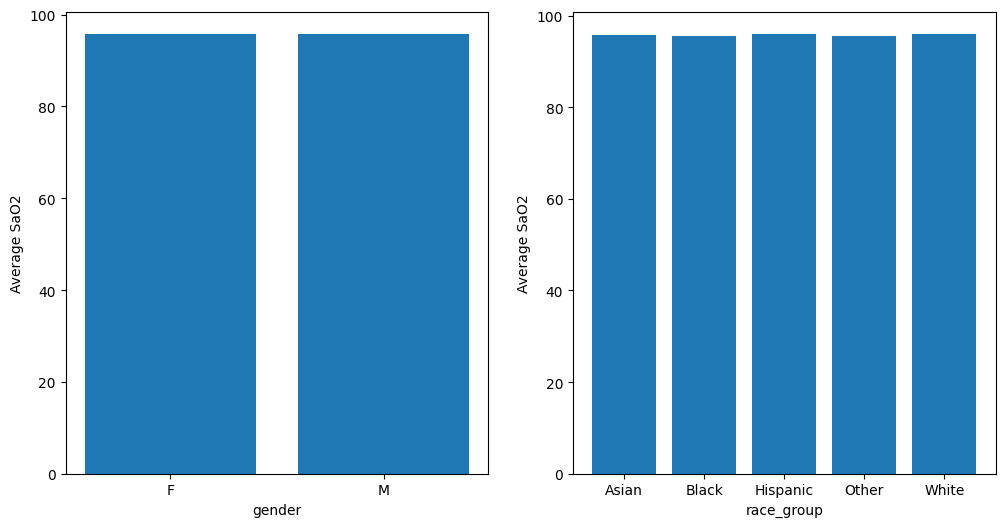

Box Plot: 


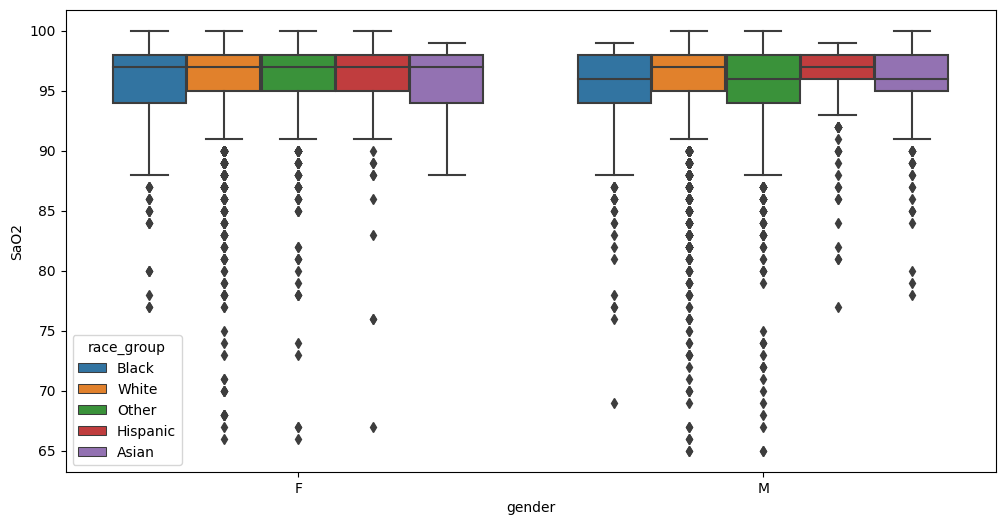

In [ ]:
# Use plot_groupby():
plot_groupby(df, group1='gender', group2='race_group', variable='SaO2', barplot=True, boxplot=True, violinplot=False)

###### ✏️ Plot the distribution of SpO2 by gender and race group

###### ✏️ 性別・人種別の**SpO2**のプロット

Bar Plot: 


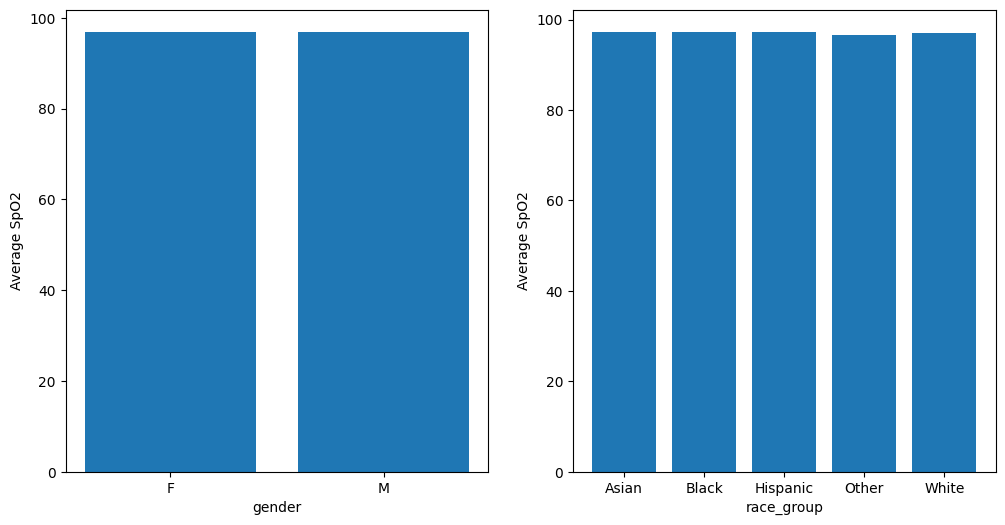

Box Plot: 


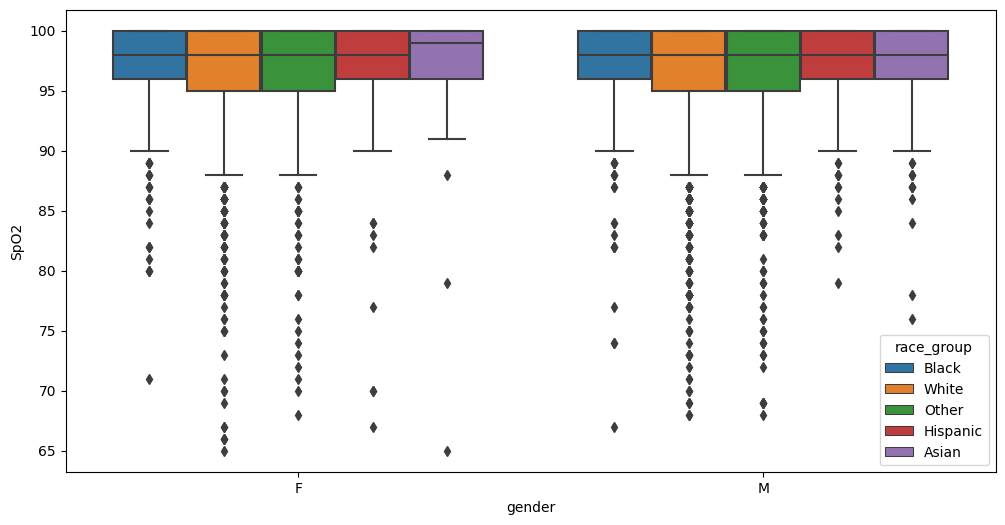

In [ ]:
# Use plot_groupby():
plot_groupby(df, group1='gender', group2='race_group', variable='SpO2')


###### ✏️ Plot the distribution of any Time Offset by gender and race group (Use violin plot)

Hint: You can use the next line of code to get all the variables related to a time offset

###### ✏️ 性別・人種のグループ別にタイムオフセット(計測された時刻の差)の分布のプロット(ヴァイオリンプロットを使う)

ヒント: 以下のコードを用いてタイムオフセットに関連する変数を取得することができます。

In [ ]:
for column in df.columns:
  if 'delta' in column:
    print(column)

delta_vent_start
delta_SpO2
delta_sofa_coag
delta_sofa_cns
delta_sofa_cv


Bar Plot: 


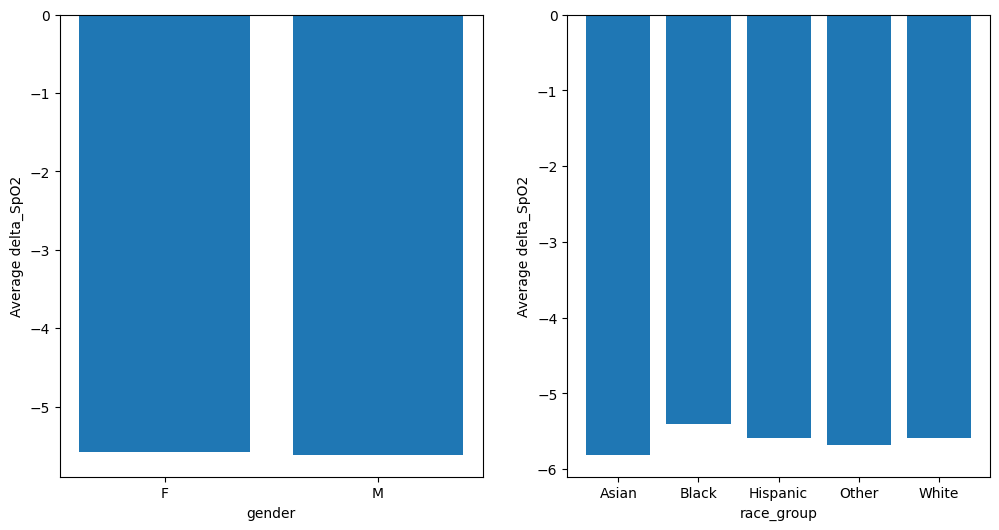

Violin Plot: 


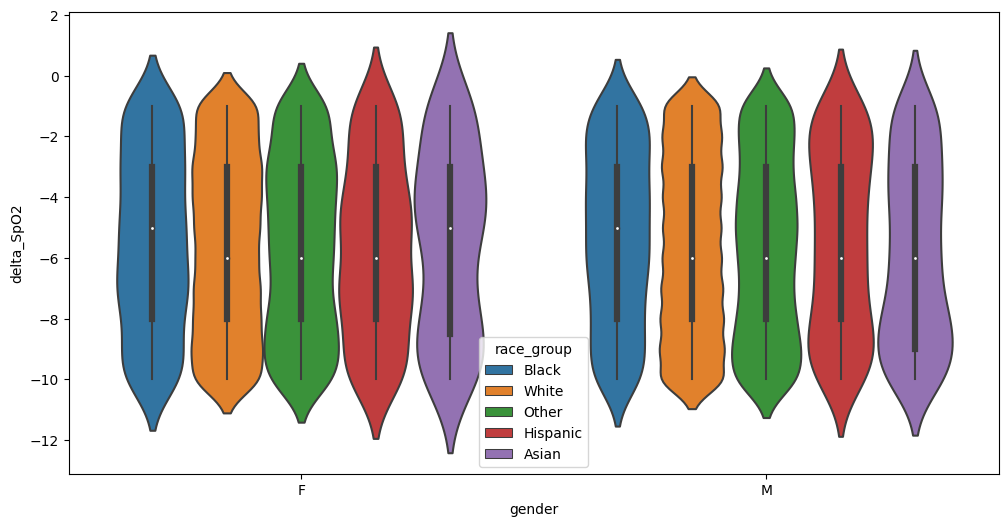

In [ ]:
# Use plot_groupby():
plot_groupby(df, group1='gender', group2='race_group', variable='delta_SpO2', barplot=True, boxplot=False, violinplot=True)

## 4. Preprocessing / 前処理
---

We know that there are some outliers so let's assume that those values al missing values and then analyze the amount of missing values for preprocessing

前章のプロットによりいくつかの外れ値があることが分かっているので、それらの値は欠損値として仮定して、前処理のために欠損値の数を分析しましょう。


### Missing values

Let's see which columns have variables with missing data

### 欠損値を見つける

どの列に欠損値があるのかを探します。

<Axes: >

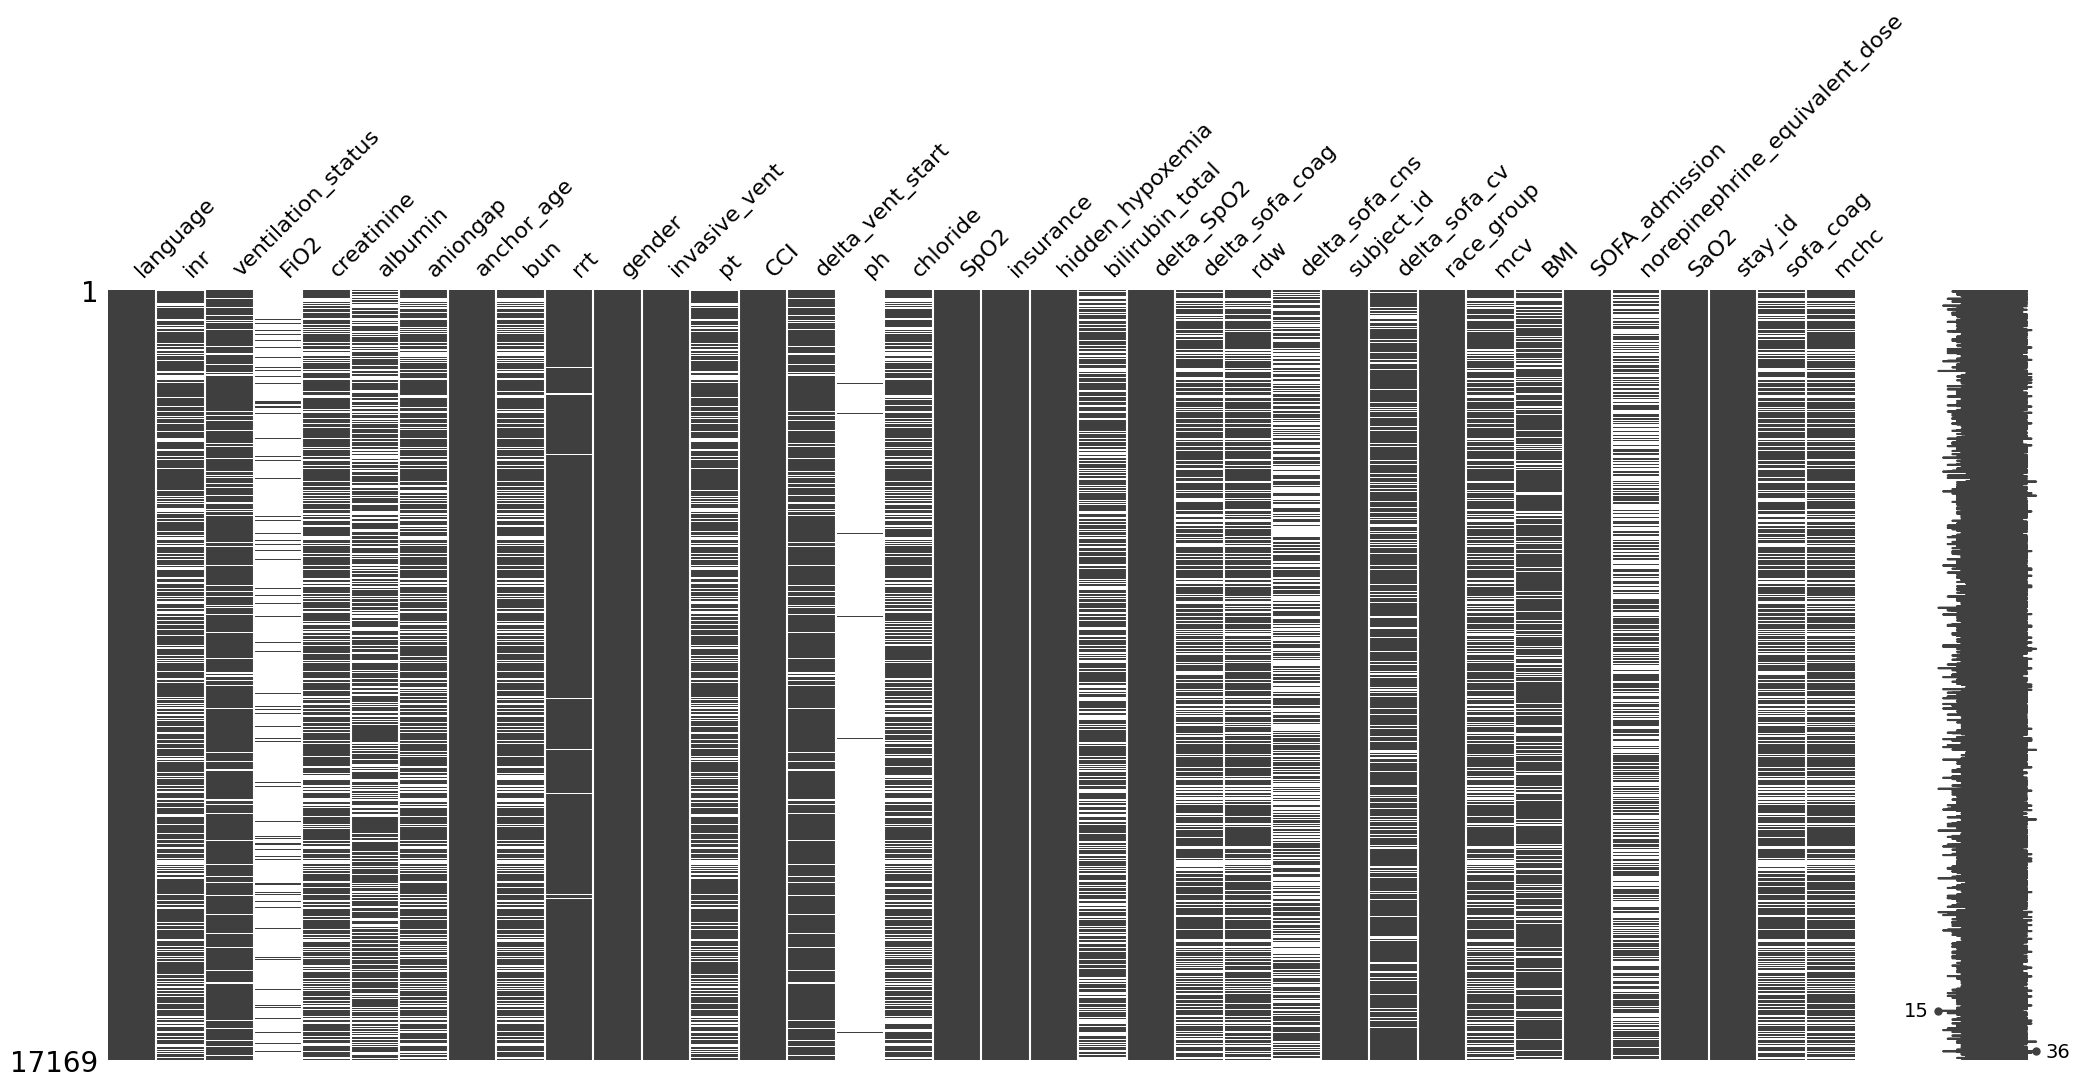

In [ ]:
msno.matrix(df)

###### ✏️ detect columns with null values
Use the function `null_values` to see the columns with missing data and the number of rows missing.

if the number of values with missing data is very high compared to the size of the dataset (E.g. 85%), in some cases it is better just to remove them

###### ✏️ nullを含む列を特定する
`null_values` 関数を用いて欠損値のある列とその行番号を求めます。

if the number of values with missing data is very high compared to the size of the dataset (E.g. 85%), in some cases it is better just to remove them

もしデータセットの大半(E.g. 85%)が欠損していた場合、その列は省いてしまったほうがいいかもしれません。

In [ ]:
### List of columns with missing values ###
### Code here ###
null_values(df)

Null values:
inr                                5007
ventilation_status                 2015
FiO2                              15894
creatinine                         5075
albumin                            5962
aniongap                           5465
bun                                5083
rrt                                 100
pt                                 5009
delta_vent_start                   2015
ph                                16982
chloride                           5100
bilirubin_total                    5984
delta_sofa_coag                    5934
rdw                                5175
delta_sofa_cns                     7855
delta_sofa_cv                      2942
mcv                                5180
BMI                                3243
norepinephrine_equivalent_dose     8486
sofa_coag                          5934
mchc                               5182
dtype: int64


### Train-Test Split
Dividing your dataset into training and test is important, since what we want is for the model to learn, not memorize.
We want to test the behavior of the model on unknown data. For that reason, the dataset should always be divided into training and test.

The way to divide it may vary... You can use 60% (training) / 40% (testing), or 70% (training) / 30% (testing), or even 50/50. The most important part is that you **make sure that in the test set you have a well-distributed data set that covers all the possibilities.**

### 訓練用とテスト用にデータセットを分割する
データセットを訓練用とテスト用に分割することは結果に関わる重要な事です。(なぜなら、モデルに求めていることは"暗記"ではなく"学習"だからです)

生成されたモデルを評価するにあたり、未知のデータにおけるモデルの挙動をテストするために、今あるデータセットを訓練用とテスト用に分割します。

分割の比率は自由です。訓練用:テスト用を6:4、7:3、5:5など決まりはありません。この時に気を付けて頂きたいことは**テスト用のデータに偏りがなく、全てのパターンを網羅できるようになっていること**です。

In [ ]:
from typing import Optional

def train_test_split_with_id(df: pd.DataFrame, test_size: float, id_column: str, stratify: array_like=None, random_state: Optional[int]=42) -> Tuple[pd.DataFrame]:
  """
  データセットを訓練用とテスト用に分割し、両方のデータセットに同じIDを持つ行が現れないようにする関数。

  引数 (型名):
    df (pandas.DataFrame): 分割したいデータセット
    test_size (float): テスト用に使用するデータの割合(ex 0.3)
    id_column (string): 患者の識別IDを含む列の名前 (訓練用とテスト用に同じ患者のデータを用いることはできません)
    stratify (array-like): 層別化(各データの割合を揃えるため)に使う関数。特に指定しない(Noneの)場合、層別化は行われません。(オプション)
    random_state (int): 分割に使用する乱数を生成するための整数(オプション).

  戻り値 (型名):
    tuple (pandas.DataFrames): 訓練用とテスト用の2つのタプル
  """
  if stratify:
    id_groups = df.groupby(id_column)
    ids = []
    ys = []
    for _, group in id_groups:
        ids.append(group[id_column].iloc[0])
        ys.append(group[stratify].iloc[0])
    ids = np.array(ids)
    ys = np.array(ys)

    train_ids, test_ids, train_ys, test_ys = train_test_split(ids, ys, test_size=test_size, stratify=ys, random_state=random_state)

  else:
    unique_ids = df[id_column].unique()
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=random_state)

  train = df[df[id_column].isin(train_ids)]
  test = df[df[id_column].isin(test_ids)]

  print(f'The train shape is {train.shape}')
  print(f'The test shape is {test.shape}')

  return train, test


###### ✏️ Split your data
Use the provided function to split your data into train and test. We have to split the dataset now so we can avoid data leakage during data imputation and data normalization

###### ✏️ データを分割する
先ほど定義した`train_test_split_with_id`関数を用いてデータセットを分割します。
データの分割により、欠損値補完や正規化の際のデータの漏れを防ぐことができます。

In [ ]:
df.shape

(17169, 36)

In [ ]:
#test_size =
#id_column = # Avoid same patient in train and test!!!
#stratify =
test_size = 0.3
id_column = 'subject_id'
stratify = ['race_group', 'hidden_hypoxemia']

#train, test = train_test_split_with_id('...')
train, test = train_test_split_with_id(df, test_size=test_size, id_column=id_column, stratify=stratify, random_state=42)

The train shape is (11831, 36)
The test shape is (5338, 36)


### Data Imputation

There are various imputation methods of different complexity, ranging from imputing using the most common value (mode) (usually used for categorical variables) or the average or median value depending on the distribution of the data (usually used for numerical variables), to imputation methods using machine learning algorithms to predict the missing value using the other variables as a reference. While any method of data imputation can be valid, you have to take care to avoid data leakage or adding bias when doing this process.

As we have the columns with missing data, let's divide the columns into two sub groups:
1. Categorical columns with missing
2. Numerical columns with missing

### 欠損値補完

欠損値補完の方法には単純なものから複雑なものまで、様々な方法があります。
最頻値(通常、カテゴリ変数に使用)を用いる方法や、データの分布に応じた平均値または中央値(通常、数値変数に使用)を用いる方法の他にも、他の変数を参照して値を予測しながら補完する、機械学習を用いた方法などがあります。

どのような方法を用いても有用な補完が可能ですが、データの漏れやバイアスの付与を考慮して行う必要があります。

欠損値のある列を2つのサブグループに分割します:
1. カテゴリー変数列の欠損
2. 数値変数列の欠損

###### ✏️ Get numerical, categorical columns and columns with missing data

Hint: You can use the function `get_categorical_numerical_variables` to get the list of categorical and mumerical columns.

Hint 2: You can use the function `null_values` as part of the logic to get the columns with missing data

###### ✏️ 数値変数を持つ列、カテゴリー変数を持つ列、欠損値を持つ列を取得する

ヒント1: `get_categorical_numerical_variables` 関数を用いて数値変数とカテゴリー変数を持つ列のリストが取得できます。

ヒント 2: `null_values` 関数は欠損値のある列を取得する方法の一部として使うことができます。

In [ ]:
# Get numerical and categorical columns:
#categorical_cols, numerical_cols =
categorical_cols, numerical_cols = get_categorical_numerical_variables(train, limit=10, ignore=None, verbose=False)

In [ ]:
# Get the columns with missing data
#columns_missing =
columns_missing = train.isnull().sum()[train.isnull().sum() > 0].index
columns_missing

Index(['inr', 'ventilation_status', 'FiO2', 'creatinine', 'albumin',
       'aniongap', 'bun', 'rrt', 'pt', 'delta_vent_start', 'ph', 'chloride',
       'bilirubin_total', 'delta_sofa_coag', 'rdw', 'delta_sofa_cns',
       'delta_sofa_cv', 'mcv', 'BMI', 'norepinephrine_equivalent_dose',
       'sofa_coag', 'mchc'],
      dtype='object')

In [ ]:
def apply_data_imputation(df: pd.DataFrame, impute_cols: List[str], test_df: Optional[pd.DataFrame]=None, groupby_cols: List[str]=[], method: str='new_category_numeric', imputation_model=LinearRegression()):
  """
  必要に応じて与えらえた列(impute_cols)に groupby を適用した後に、列毎の欠損値補完(Data Imputation)を行う.
  !!! 注意事項 !!!
  カテゴリー変数に対してnew_category関数を、数値変数に対してnew_category_numeric関数以外を適用する場合以外は、必ずデータの分割後に行うこと。そうしないとデータ漏れを招く恐れがあります。

  引数(型名):
    df(pd.DataFrame): 欠損値補完を行うデータ
    impute_cols(list): 欠損値補完を適用する列名のリスト
    test_df(pd.DataFrame): 訓練用データを参照して欠損値補完を行うテスト用データ(オプション)
    groupby_cols(list): method='median', 'mean', 'mode'の場合はデータをグループ化するためのカラム名、 method='model'の場合はモデルの特徴を表すカラム名のリスト (E.g.: groupby_cols=['race_group', 'gender']).
    method(string): 欠損値補完の方法。 'median'、'mean'、'mode'、'new_category'、'new_category_numeric'、'model'の6つが選択可能
    model: methodが'model'の場合に欠損値の予測に用いるsklearnモデル

  戻り値:
    欠損値のある列のデータを補完後のデータ
  """
  imputer = {}

  for col in impute_cols:

    # Group the data and calculate the method (E.g. Median) for each group
    if method == 'median':
      # Impute using median (for numerical values)
      imputation_values = df.groupby(groupby_cols)[col].median()

    elif method == 'mean':
      # Impute using mean (for numerical values)
      imputation_values = df.groupby(groupby_cols)[col].mean()

    elif method == 'mode':
      # Impute using mode (for categorical values)
      imputation_values = df.groupby(groupby_cols)[col].agg(pd.Series.mode)

    elif method == 'new_category':
      # Add a new category 'None' in the dataset (for categorical values)
      new_category_val = 'None'
      imputer[col] = new_category_val
      df[col] = df[col].fillna(new_category_val)
      if test_df is not None:
        test_df[col] = test_df[col].fillna(new_category_val)


    elif method == 'new_category_numeric':
      # Add an anomalous data in the dataset (for numerical values)
      new_category_val = 0
      # If there's not 0, replace nan with 0
      if not((df[col] == 0).any()):
        new_category_val = 0
      # If there's not positive numbers, replace nan with 1
      elif not((df[col] >= 0).any()):
        new_category_val = 1
      # If there's not negative numbers, replace nan with 1
      elif not((df[col] <= 0).any()):
        new_category_val = -1
      else:
        # Replace with min value - 100
        new_category_val = df[col].min() - 100

      imputer[col] = new_category_val
      df[col] = df[col].fillna(new_category_val)
      if test_df is not None:
        test_df[col] = test_df[col].fillna(new_category_val)


    elif method == 'model':
      # If the variable is categorical, convert to numeric:
      if df[col].dtype == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].dropna())

      # Create a linear regression model to impute missing values
      model = imputation_model

      # Get the data with complete column
      complete_data = df.dropna(subset=[col])

      # Encode categorical columns if needed in x data
      le = {}
      for col_group in groupby_cols:
        if df[col_group].dtype == 'object':
          le[col_group] = LabelEncoder()
          complete_data[col_group] = le[col_group].fit_transform(complete_data[col_group])


      # Fit the model on the complete data
      X = complete_data[groupby_cols]
      # Replace any remaining NaNs with the column mean
      X = X.fillna(X.mean())
      y = complete_data[col]
      model.fit(X, y)

      if df[col].dtype == 'object':
        imputer[col] = (model, encoder, le)
      else:
        imputer[col] = (model, le)

      ### Impute column using the model to predict the value:
      missing_data = df[df[col].isna()].copy()
      if test_df is not None:
        missing_data_test = test_df[test_df[col].isna()].copy()

      # Encode categorical columns if needed in x data
      for col_group in groupby_cols:
        if missing_data[col_group].dtype == 'object':
          missing_data[col_group] = le[col_group].transform(missing_data[col_group].dropna())
          if test_df is not None:
            missing_data_test[col_group] = le[col_group].transform(missing_data_test[col_group].dropna())

      for index, row in missing_data.iterrows():
        values = row[groupby_cols].values.reshape(1, -1)
        imputed_value = model.predict(values)
        df.at[index, col] = imputed_value[0]

      if test_df is not None:
        for index, row in missing_data_test.iterrows():
          values = row[groupby_cols].values.reshape(1, -1)
          imputed_value = model.predict(values)
          test_df.at[index, col] = imputed_value[0]

      if method in ['median', 'mean', 'mode']:
        imputer[col] = imputation_values
        # Fill missing values with the method of the corresponding group
        df[col] = df.apply(lambda x: imputation_values[tuple(x[groupby_cols])] if pd.isna(x[col]) else x[col], axis=1)
        if test_df is not None:
          test_df[col] = test_df.apply(lambda x: imputation_values[tuple(x[groupby_cols])] if pd.isna(x[col]) else x[col], axis=1)

  if test_df is not None:
    return df, test_df, imputer
  else:
    return df, imputer


###### ✏️ Apply data imputation to categorical variables

1. Get from the categorical variables the list of categorical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

###### ✏️ カテゴリー変数に欠損値補完を適用する

1. 欠損値のあるカテゴリー変数のリストから、欠損値補完を行う列を取得する。
2. `apply_data_imputation`関数を使用して訓練用とテスト用のデータの欠損値補完を行う。pandasやsklearnの他の方法を使っても問題ありませんが、それを適用することによって生じる可能性のあるデータの偏りについてよく考えてから適用しましょう。

In [ ]:
# Get from columns with missing data the categorical columns
#categorical_cols_missing =
categorical_cols_missing = [column for column in categorical_cols if column in columns_missing]
categorical_cols_missing

['ventilation_status', 'rrt', 'sofa_coag']

**Important❗❗❗** If you apply other technique than `new_category` on categorical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

**注意事項❗❗❗** もし`new_category`関数以外の方法で欠損値補完を行う場合、必ず**訓練用データとテスト用データとの分割後に**行うこと。こうしないとデータ漏れを引き起こす可能性があります。

In [ ]:
#method =  # 'mode', 'new_category'
#groupby_cols =  # E.g. ['race_group', 'gender'] or None if is new_category

method = 'new_category' # 'mode', 'new_category'
groupby_cols = None # E.g. ['race_group', 'gender']
train, test, imputer = apply_data_imputation(train, impute_cols=categorical_cols_missing, method=method, groupby_cols=groupby_cols, test_df=test)

/tmp/ipykernel_6621/382285403.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(new_category_val)
/tmp/ipykernel_6621/382285403.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].fillna(new_category_val)


###### ✏️ Apply data imputation to Numerical variables

1. Get from the numerical variables the list of numerical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

###### ✏️ Apply data imputation to Numerical variables

1. 欠損値のある数値変数のリストから、欠損値補完を行う列を取得する。

2. `apply_data_imputation`関数を使用して訓練用とテスト用のデータの欠損値補完を行う。pandasやsklearnの他の方法を使っても問題ありませんが、それを適用することによって生じる可能性のあるデータの偏りについてよく考えてから適用しましょう。

In [ ]:
# Get from columns with missing data the numerical columns
#numerical_cols_missing =
numerical_cols_missing = [column for column in numerical_cols if column in columns_missing]
numerical_cols_missing

['inr',
 'FiO2',
 'creatinine',
 'albumin',
 'aniongap',
 'bun',
 'pt',
 'delta_vent_start',
 'ph',
 'chloride',
 'bilirubin_total',
 'delta_sofa_coag',
 'rdw',
 'delta_sofa_cns',
 'delta_sofa_cv',
 'mcv',
 'BMI',
 'norepinephrine_equivalent_dose',
 'mchc']

**Important ❗❗❗** If you apply other technique than `new_category_numeric` on numerical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

**注意事項❗❗❗** もし`new_category_numeric`関数以外の方法で以外の方法で訓練用データとテスト用データとの分割後に行うこと。こうしないとデータ漏れを引き起こす可能性があります。

In [ ]:
#method = # 'median', 'mean', 'new_category_numeric', 'model'
#groupby_cols =  # E.g. ['race_group', 'gender'] or None if is new_category_numeric

method = 'new_category_numeric' # 'median', 'mean', 'new_category_numeric', 'model'
groupby_cols = None # E.g. ['race_group', 'gender']

train, test, imputer = apply_data_imputation(train, impute_cols=numerical_cols_missing, method=method, groupby_cols=groupby_cols, test_df=test)

/tmp/ipykernel_6621/382285403.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(new_category_val)
/tmp/ipykernel_6621/382285403.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].fillna(new_category_val)


###### ✏️ Let's check null values again

Print the coluns with missing values (if any) in train and test set.

There should be no columns with missing data, if so check the previous tasks

###### ✏️ null値がないかの再確認

欠損値補完を行った列(あれば)を表示して確認します。

この時点で欠損値のある列はないはずです。もし欠損がある場合はここまでの処理を確認しましょう。


In [ ]:
### List of columns with mussing values ###
print('#'*20, ' Null train: ', '#'*20)
null_values(train)
### List of columns with mussing values ###
print('#'*20, ' Null test: ', '#'*20)
null_values(test)

####################  Null train:  ####################
There aren't null values in the dataframe
####################  Null test:  ####################
There aren't null values in the dataframe


In [ ]:
train["insurance"].value_counts()

Other       5611
Medicare    5488
Medicaid     732
Name: insurance, dtype: int64

### Save the file!
Finally let's save the dataset as a csv file! 😀

### ファイルの保存
最後に、データセットをcsvファイルに保存しましょう！ 😀

###### ✏️ Save your train and test dataset as a csv file:

Hint: use `df.to_csv('path/data_clean.csv', index=False)`

###### ✏️ 訓練用データとテスト用データをcsvファイルで保存する:

ヒント: `df.to_csv('path/data_clean.csv', index=False)` を使ってみましょう

In [ ]:
# Save your train and test dataset as a csv file:
path_to_save_train = "/content/drive/MyDrive/workshops_preparation/for_japan/solutions/output/workshop_2_train.csv"
path_to_save_test = "/content/drive/MyDrive/workshops_preparation/for_japan/solutions/output/workshop_2_test.csv"


In [ ]:
import os
import pandas as pd

# Function to create the directory if it doesn't exist
def create_directory_if_not_exists(path):
    directory = os.path.dirname(path)
    os.makedirs(directory, exist_ok=True)

# Save function to be used for both train and test datasets
def save_dataset(dataset, path_to_save):
    create_directory_if_not_exists(path_to_save)
    dataset.to_csv(path_to_save, index=False)

In [ ]:
# Export files:
save_dataset(train, path_to_save_train)
save_dataset(test, path_to_save_test)

#### Acknowledgement
日本語訳 (Translation)：高砂茉莉花（Marika Takasago）